# Projet de modélisation d'un mix énergétique issu 100% d'ENR

## II. Analyse des résultats de M. Quiron

### Imports

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import csv
import time
import sys

In [2]:
colors = ["steelblue", "Mediumaquamarine", "#FFE066", "slateblue", "#FFD8A8", "Lightslategray", "grey", "#09F1D3", "#74C0FC"]

## 1. Analyse de plusieurs scénarios : variation des coûts des technologies

In [3]:
scenarios = pd.read_csv("outputs/scenarios.csv", index_col="scen")
cost_decomposition = pd.read_csv("outputs/cost decomposition for all scenarios.csv", index_col="scen")
scenarios

,offshore,onshore,pv,battery,methanation,offshore.1,onshore.1,pv.1,battery.1,methanation.1
scen,,,,,,,,,,
1,143.988965,84.683285,20.566800,5.316988,71.705432,-25%,-25%,-50%,-50%,-50%
2,143.988965,84.683285,20.566800,5.316988,143.410864,-25%,-25%,-50%,-50%,central
3,143.988965,84.683285,20.566800,5.316988,215.116296,-25%,-25%,-50%,-50%,50%
4,143.988965,84.683285,20.566800,10.633975,71.705432,-25%,-25%,-50%,central,-50%
5,143.988965,84.683285,20.566800,10.633975,143.410864,-25%,-25%,-50%,central,central
...,...,...,...,...,...,...,...,...,...,...
311,238.810112,139.736336,57.895985,10.633975,143.410864,25%,25%,50%,central,central
312,238.810112,139.736336,57.895985,10.633975,215.116296,25%,25%,50%,central,50%
313,238.810112,139.736336,57.895985,15.950963,71.705432,25%,25%,50%,50%,-50%


### 1.1. Variation du coût des technologies génératrices d'électricité renouvelables (vre) : PV, Onshore, Offshore

In [4]:
scen = 157 #choosen scenario (central pour tout)
list(scenarios.iloc[scen][5:])

['central', 'central', 'central', 'central', 'central']

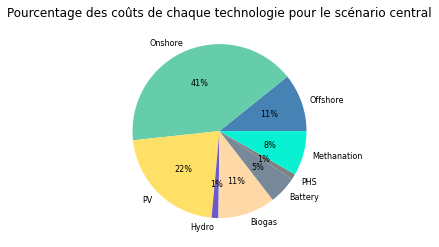

In [39]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=8), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

#### Influence du coût de l'éolien offshore

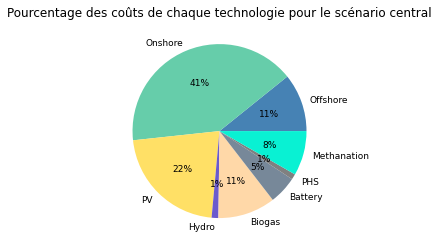

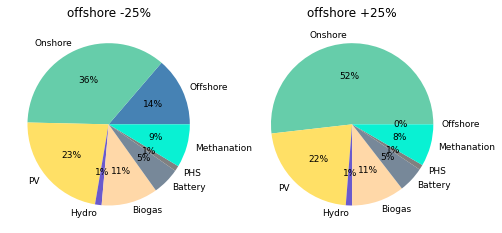

In [43]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=9), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

scen1 = 112  #offshore -25%
scen2 = 202  #offshore +25%
fig, axs = plt.subplots(1,2, figsize=(8,8))

axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"],  
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[0].set_title('offshore -25%')

axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"],  
           autopct = lambda y: str(int(round(y, 0))) + '%',
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[1].set_title('offshore +25%')

plt.show()

Même si le prix de l'éolien maritime diminue, ce ne sera pas suffisant pour que le mix diffère de façon important du mix de référence (157).  
Si l'éolien offshore a un prix plus élevé alors il va disparaitre du mix énergétique car trop coûteux.

#### Influence du coût du solaire

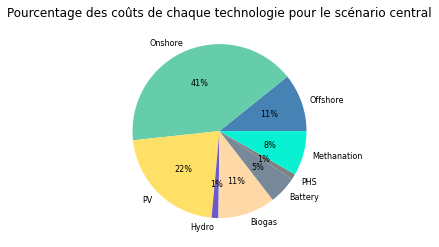

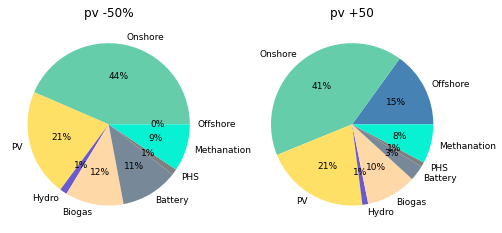

In [44]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=8), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

scen1 = 139  #pv -50%
scen2 = 175  #pv +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))

axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
           autopct = lambda y: str(int(round(y, 0))) + '%',
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[0].set_title('pv -50%')

axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
           autopct = lambda y: str(int(round(y, 0))) + '%',
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[1].set_title('pv +50')

plt.show()

La diminution du prix des panneaux solaires entraine une forte augmentation du stockage par batterie qui permettent de stocker sur du court terme donc notamment les excès de production solaire ; on remarque également une légère augmentation du biogas pour compenser la perte du offshore. L'augmentation à l'extême du prix des panneaux solaires ne boulverse pas la composition du mix mis à part une légère augmentation de l'éolien offshore.

On remarque que si une technologie a un prix plus faible alors l'offshore a tendance a disparaitre mais si on augmente le prix d'un technologie alors il va reprendre une part importante du mix. La présence du offshore fait diminuer le besoin en batteries.

#### Influence du coût de l'éolien terrestre

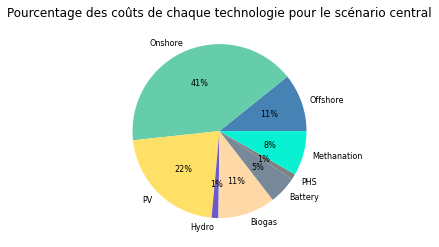

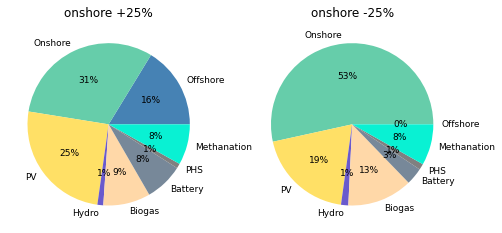

In [45]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=8), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

scen1 = 247  #onshore +25%
scen2 = 67   #onshore -25%
fig, axs = plt.subplots(1,2, figsize=(8,8))

axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"],  
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[0].set_title('onshore +25%')

axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"],  
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[1].set_title('onshore -25%')

plt.show()

Même en augmentant le prix de l'éolien onshore on lui consacre une part importante dans le mix ; le solaire et l'offshore participent à la compensation de sa diminution.
Pareil que pour la diminuation du prix des panneaux solaires, l'éolien offshore disparait et est remplacé par la technologie dont le prix a diminué : éolien onshore. La différence lorsque le solaire a une part moins importante dans le mix est le besoin en batteries qui est plus faible et compensé par le biogas.

### 1.2. Variation du coût des technologies de stockage : batteries et méthanation 

#### Influence du coût des batteries

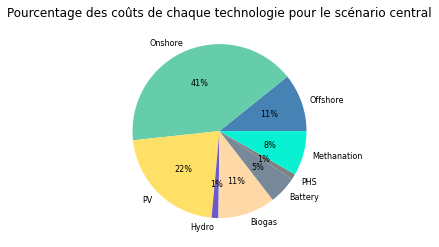

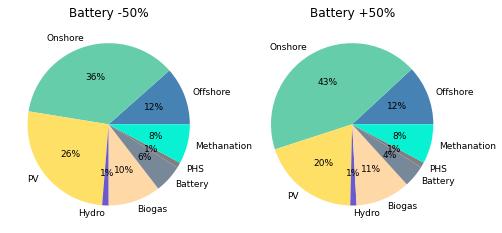

In [46]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=8), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

scen1 = 154  #batterie -50%
scen2 = 160  #batterie +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))

axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[0].set_title('Battery -50%')

axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"],  
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[1].set_title('Battery +50%')

plt.show()

Même avec un forte augmentation du prix des batteries sa part dans le mix reste importante (autant que dans le scénario central). On remarque que le solaire nécessite plus de stockage par batterie que l'éolien onshore c'est pour cela que la part de ce dernier augmente lors d'une augmentation du prix des batteries.

#### Influence du coût de la méthanation

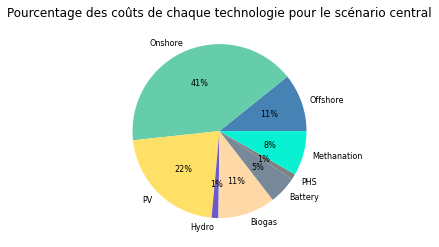

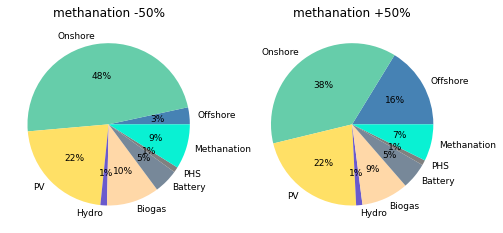

In [47]:
plt.figure()
plt.pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen]))), 
        labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
        autopct = lambda y: str(int(round(y, 0))) + '%',
        textprops=dict(color='k', fontsize=8), colors=colors)
plt.title("Pourcentage des coûts de chaque technologie pour le scénario central")
plt.show()

scen1 = 156  #méthanation -50%
scen2 = 158  #méthanation +50%
fig, axs = plt.subplots(1,2, figsize=(8,8))

axs[0].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen1]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
           autopct = lambda y: str(int(round(y, 0))) + '%',
           textprops=dict(color='k', fontsize=9), colors=colors)
axs[0].set_title('methanation -50%')

axs[1].pie(list(map(lambda x: float(x[:-1]),list(cost_decomposition.iloc[scen2]))), 
           labels = ["Offshore","Onshore","PV","Hydro","Biogas","Battery","PHS","Methanation"], 
           autopct = lambda y: str(int(round(y, 0))) + '%', 
           textprops=dict(color='k', fontsize=9), colors=colors)

axs[1].set_title('methanation +50%')
plt.show()

Avec un coût de la méthanation plus faible, la technologie offshore diminue pour laisser plus au onshore car moins cher mais avec un besoin de stockage plus important. Avec un coût plus élevé on observe le phénomène inverse.

### 1.3. Variations croisées du coût des technologies de stockage et génératrices.

Dans cette partie j'ai essayé de simuler des scénarios extrêmes selon les interprétations des deux parties précédentes. En modifiant simultanément les coûts des technologies génératrices et de stockage notamment dans les pires cas :  
- le coût des stockages augmente et le coût du offshore aussi 
- le coût des stockages augmente et le coût des pv et du onshore aussi

et des cas particuliers :
- le coût du stockage augmente mais le coût du offshore diminue (on aurait tendance à penser que la part du offshore va fortement augmenter et ce n'est pas le cas)
- le coût du stockage diminue mais le coût des pv et onshore augmente (part des pv plus importante)
- tout augmente (un peu plus de offshore)
- tout diminue (un peu plus de pv)
- le coût des technologies génératrices augmente et le coût du stockage diminue (pareil)
- le coût des technologies génératrices diminue et le coût du stockage augmente (+ pv et onshore - offshore)

Globalement, les tests croisés ne m'ont pas permis de voir émerger une nouvelle tendance. Les conclusions précédentes sont confirmées. 

## 2. Analyse des autres sorties :

### 2.1. Résultats robustes vs résultats sensibles

In [10]:
sens = pd.read_csv("outputs/sensitivity results.csv")
robus = pd.read_csv("outputs/robustness results.csv")

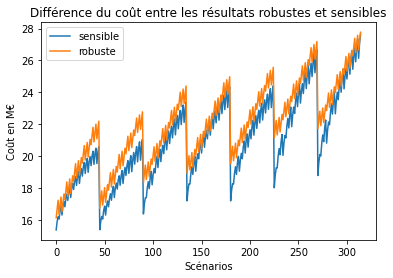

In [11]:
plt.plot(sens['cost'], label='sensible')
plt.plot(robus['cost'], label='robuste')
plt.title('Différence du coût entre les résultats robustes et sensibles')
plt.xlabel('Scénarios')
plt.ylabel('Coût en M€')
plt.legend()

Les résultats robustes donnent des coûts plus élevés que les résultats "sensibles".

### 2.2 Production des vre sur l'annéee 2016

In [15]:
prod2016 = pd.read_csv("outputs/with 2016 demand/hourly profiles with demand of 2016.csv", index_col = "hour")
prod2016.head()

,offshore,onshore,pv,river,lake,biogas,gas,phs,battery,methanation,demand,Pump,ElecStr,CH4,Bat_SOC,PHS_SOC,CH4_SOC,elec_price,gas_price
hour,,,,,,,,,,,,,,,,,,,
0,14.66,50.77,0.0,1.27,0.0,0.0,0.0,1.99,0.0,0.0,60.17,0.00,0.0,-8.52,0.0,69.39,8203.50,0.0,0.0
1,14.91,52.38,0.0,1.30,0.0,0.0,0.0,0.00,0.0,0.0,56.68,-3.39,0.0,-8.52,0.0,67.18,8208.53,0.0,0.0
2,14.91,53.38,0.0,1.11,0.0,0.0,0.0,0.00,0.0,0.0,55.78,-5.09,0.0,-8.52,0.0,70.40,8213.56,0.0,0.0
3,14.80,53.74,0.0,1.12,0.0,0.0,0.0,0.00,0.0,0.0,53.16,-7.97,0.0,-8.52,0.0,75.24,8218.59,0.0,0.0
4,14.44,53.46,0.0,1.21,0.0,0.0,0.0,0.00,0.0,0.0,50.21,-9.30,0.0,-8.52,0.0,82.81,8223.62,0.0,0.0


#### Part des différentes technologies sur le mix de 2016

0.9131465441003663


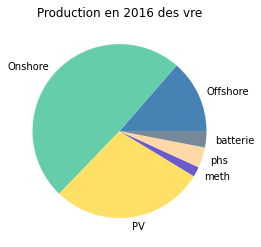

In [16]:
p_offshore = 0
p_onshore = 0
p_pv = 0
p_meth = 0
p_phs = 0
p_batterie = 0

for i in range(8760):
    p_offshore += prod2016['offshore'][i]
    p_onshore += prod2016['onshore'][i]
    p_pv += prod2016['pv'][i]
    p_meth += prod2016['methanation'][i]
    p_phs += prod2016['phs'][i]
    p_batterie += prod2016['battery'][i]

p_shore_pv = p_offshore + p_onshore + p_pv
p_tot = p_offshore + p_onshore + p_pv + p_meth + p_phs + p_batterie
print(p_shore_pv / p_tot)
p = np.array([p_offshore,p_onshore,p_pv,p_meth,p_phs,p_batterie])
plt.pie(p, labels = ["Offshore","Onshore","PV","meth","phs","batterie"], colors=colors)
plt.title("Production en 2016 des vre")
#plt.legend()
plt.show()

#### Evolution de la production des différentes technologies sur l'annéee 2016

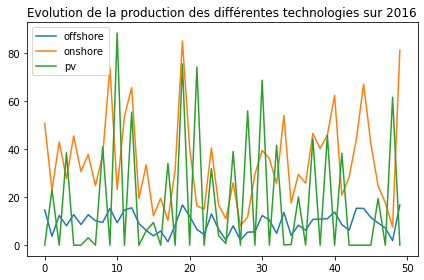

In [14]:
#mois = [0,743,1439,2183,2903,3647,4367,5111,5855,6575,7319,8039]
x = np.linspace(0,8759,50, dtype=int)
p_offshore = []
p_onshore = []
p_pv = []
demande = []

for i in x:
    p_offshore += [prod2016['offshore'][i]]
    p_onshore += [prod2016['onshore'][i]]
    p_pv += [prod2016['pv'][i]]
    demande += [prod2016['demand'][i]]

fig, ax2 = plt.subplots()
#ax1.plot(demande, "r", label = 'demande')
#ax2 = ax1.twinx()
ax2.plot(p_offshore, label = 'offshore')
ax2.plot(p_onshore, label = 'onshore')
ax2.plot(p_pv, label = 'pv')
plt.title('Evolution de la production des différentes technologies sur 2016')
#ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()

#### Evolution du stockage des différentes technologies sur l'annéee 2016

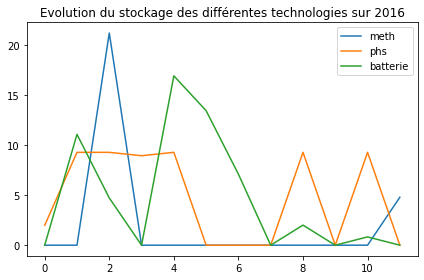

In [15]:
mois = [0,743,1439,2183,2903,3647,4367,5111,5855,6575,7319,8039]
p_meth = []
p_phs = []
p_batterie = []
demande = []

for i in mois:
    p_meth += [prod2016['methanation'][i]]
    p_phs += [prod2016['phs'][i]]
    p_batterie += [prod2016['battery'][i]]
    demande += [prod2016['demand'][i]]

fig, ax2 = plt.subplots()
#ax2.plot(demande, "r", label = 'demande')
#ax2 = ax1.twinx()
ax2.plot(p_meth, label='meth')
ax2.plot(p_phs, label = 'phs')
ax2.plot(p_batterie, label='batterie')
plt.title('Evolution du stockage des différentes technologies sur 2016')
#ax1.legend()
ax2.legend()
fig.tight_layout()
plt.show()